In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#import the dataset:-

diabetes = pd.read_csv("diabetes.csv")
heart = pd.read_csv("HeartDisease.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
heart.shape

(303, 14)

#merging the both dataset which have nearly common column features
#which is age and Outcome

In [7]:
diabetes=diabetes.drop(['Pregnancies', 'Glucose' , 'BloodPressure' , 'SkinThickness' ,'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' ], axis=1)

In [8]:
diabetes.head()

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1


In [9]:
heart = heart.drop(['sex' , 'cp' , 'trestbps' , 'chol' , 'fbs' ,'restecg' , 'thalach' , 'exang' , 'oldpeak' , 'slope' , 'ca' , 'thal'] , axis=1 )

In [10]:
heart.head()

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


In [11]:
diabetes.shape

(768, 2)

In [12]:
heart.shape

(303, 2)

In [13]:
heart.rename(columns = {'age':'Age' , 'target':'Outcome'} , inplace=True)

In [14]:
heart.head()

,Age,Outcome
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


# Merging the dataset:-

In [15]:
merged_dataset = pd.concat([diabetes , heart])


In [16]:
merged_dataset.head()

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1


In [17]:
merged_dataset.shape

(1071, 2)

# Data Visualization:-

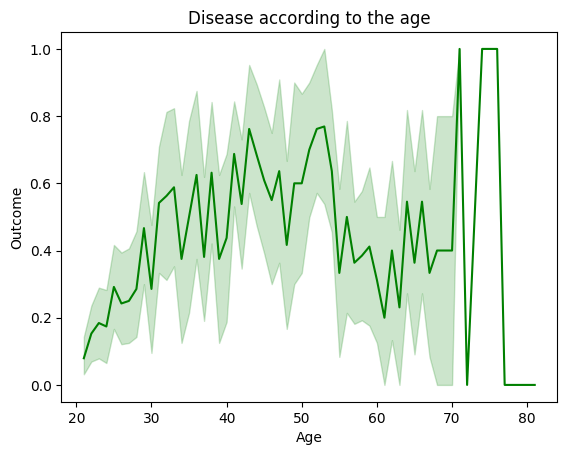

In [21]:
sns.lineplot(x="Age" , y="Outcome" , data=merged_dataset , color="green")
plt.title("Disease according to the age")
plt.show() 

Here we can see that ages 70-80 have maximum number disease either Heart disease or Diabetes

In [22]:
#total outcomes

merged_dataset["Outcome"].value_counts()

0    638
1    433
Name: Outcome, dtype: int64

0-> patient who have no disease .....  1-> patient who have disease either heart disease or diabetes

In [23]:
#mean of variables with the outcome

merged_dataset.groupby("Outcome").mean()

,Age
Outcome,
0,36.686520
1,42.946882


Here, we can see that people average age of nearly 43 have some kind of the disease either Heart or Diabetes

# Marking target and Predictor variable:-

In [24]:
x = merged_dataset.iloc[: , [0]]         #predictor variable

In [25]:
x

,Age
0,50
1,31
2,32
3,21
4,33
...,...
298,57
299,45
300,68
301,57


In [26]:
y = merged_dataset.iloc[: , [1]]         #target variable

In [27]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
298,0
299,0
300,0
301,0


# Splitting the dataset for training and testing:-

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=42) #test size 20% , train size 80%

In [30]:
x_train

,Age
242,64
688,23
243,33
180,55
30,41
...,...
330,46
466,22
121,24
276,58


In [31]:
x_test

,Age
184,40
572,22
309,30
162,41
711,40
...,...
331,25
66,51
260,34
585,22


In [32]:
y_train

,Outcome
242,0
688,0
243,1
180,0
30,1
...,...
330,0
466,0
121,0
276,0


In [33]:
y_test

,Outcome
184,0
572,0
309,1
162,1
711,0
...,...
331,0
66,1
260,0
585,0


In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 1)
(215, 1)
(856, 1)
(215, 1)


# Logistic Regression:-

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR = LogisticRegression()

LR.fit(x_train,y_train)     #we have fitted data into the train model

C:\Users\Tanay's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_prediction = LR.predict(x_test)  

In [40]:
y_prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

# Accuracy checking:-

In [41]:
from sklearn.metrics import confusion_matrix 

In [43]:
confusion_matrix(y_test , y_prediction)              #TP+TN/Total

array([[104,  31],
       [ 58,  22]], dtype=int64)

In [44]:
(104+22)/(104+22+31+58)

0.586046511627907

bad accuracy

# KNN algo:-

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors=5 , metric="minkowski" , p=2)        #here p = 2 means we are using euclidean dist.

In [47]:
KNN.fit(x_train , y_train)

C:\Users\Tanay's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [48]:
y_predict = KNN.predict(x_test)

In [49]:
y_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [50]:
confusion_matrix(y_test , y_predict)

array([[92, 43],
       [37, 43]], dtype=int64)

In [58]:
(92+43)/(92+43+43+37)

0.627906976744186

average accuracy but better than the Logistic Regression algo

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_predict = lr.predict(x_test)

# error check:-

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test , y_predict)

0.2267293308246712

since error is low, lower the model better is the accuracy , which is good model